In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体，用于支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [8]:
# 定义二元目标函数
def func(x, y):
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

# 对x求偏导数
def partial_derivative_x(x, y):
    return 2 * (x ** 2 + y - 11) * (2 * x) + 2 * (x + y ** 2 - 7)

# 对y求偏导数
def partial_derivative_y(x, y):
    return 2 * (x ** 2 + y - 11) + 2 * (x + y ** 2 - 7) * (2 * y)

In [9]:
def gradient_descent(learning_rate, num_iterations):
    x = np.random.rand()
    y = np.random.rand()
    x_history = [x]
    y_history = [y]
    for _ in range(num_iterations):
        dx = partial_derivative_x(x, y)
        dy = partial_derivative_y(x, y)
        x -= learning_rate * dx
        y -= learning_rate * dy
        x_history.append(x)
        y_history.append(y)
    return x, y, func(x, y), x_history, y_history

In [10]:
learning_rate = 0.001
num_iterations = 1000
min_x, min_y, min_value, x_history, y_history = gradient_descent(learning_rate, num_iterations)
print(f"近似全局最小值点: x = {min_x}, y = {min_y}")
print(f"近似全局最小值: {min_value}")

近似全局最小值点: x = 3.000000000000817, y = 1.999999999998027
近似全局最小值: 5.863915497426248e-23


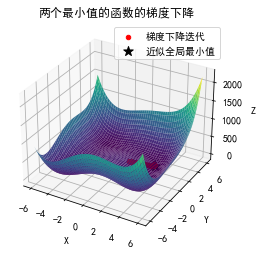

In [11]:
# 生成数据用于绘制3D图像
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制函数的3D曲面
ax.plot_surface(X, Y, Z, cmap='viridis')

# 绘制梯度下降迭代过程的散点
ax.scatter(np.array(x_history), np.array(y_history), func(np.array(x_history), np.array(y_history)), c='r', label='梯度下降迭代')

# 标记找到的最小值点
ax.scatter(min_x, min_y, min_value, c='black', marker='*', s=100, label='近似全局最小值')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('两个最小值的函数的梯度下降')
ax.legend()
plt.show()